In [54]:
# Rum Yue

In [53]:
%%HTML
<button onclick="$('.input, .prompt, .output_stderr, .output_error, .output_result').toggle();">Toggle Code</button>

## Monte Carlo Simulation on S&P 500 Price

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse

#### Data set
here we import the true return data from Daw Jones S&P 500 index from last 11 years (Mar. 2009 - April. 2019)

In [2]:
train = pd.read_csv('sp500 price.csv', header=None, names = ['timing', 'True Return'])

Preprocess the train data for columns of true return and corresponding date.

In [3]:
train = train.iloc[6:]

In [4]:
train = train.reset_index(drop = True)

In [8]:
train.head()

,timing,True Return,date
0,2009-03-31,1292.98,2009-03-31
1,2009-04-01,1314.63,2009-04-01
2,2009-04-02,1352.47,2009-04-02
3,2009-04-03,1365.66,2009-04-03
4,2009-04-06,1354.36,2009-04-06


In [6]:
train['timing'] = pd.to_datetime(train.timing)

In [7]:
train['date'] = train['timing'].dt.date

In [30]:
train.shape

(2524, 3)

In [9]:
date = train[['date']].values

First take a look at the curve:

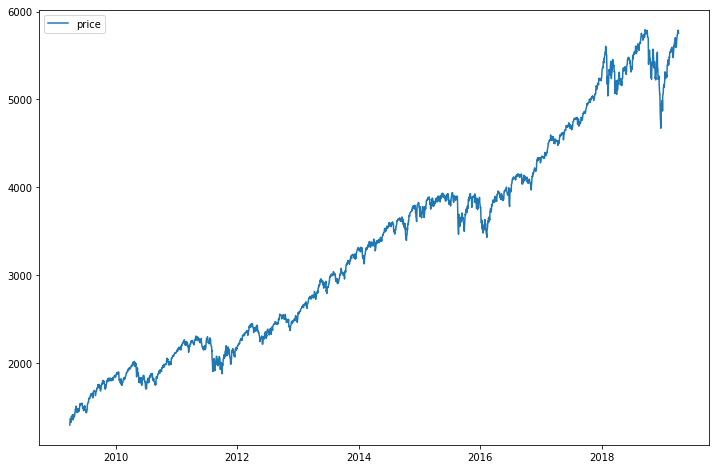

In [11]:
plt.figure(figsize = (12, 8))
tr = train[['True Return']].values
date = train[['date']].values
plt.plot(date, tr, label = 'price')

plt.legend()
plt.show()

### Black-Scholes model (B-S) for prices 
$$ S(t) = S_0\cdot \exp((\mu - \frac{\sigma^2}{2})t + \sigma W_t)
$$

In [31]:
def S(mu, sigma, t, S0=1292.98):
    SS = 0
    for j in range(t):
        SS += mu - ((sigma)**2)/2 + (sigma) * np.random.normal(0,1)
        
    value = S0 * np.exp(SS)
    
    return value

### Monte Carlo simulation (MC)
1000 times in computing the average price value at (unit) day k will lead to (up to) $1 - 3\% \approx 97\%$ accuracy and stability.

### Fasten the training process
We select by order the true return data from train file per 7 days (any other unit time is fine), the goal is to shrink the training size since Monte Carlo requires computational space.

In [32]:
new = []
for i in range(len(tr)):
    if i % 7 == 0:
        new.append(tr[i])
new = np.asarray(new)
new.shape

(361, 1)

In [42]:
iters = 100
error = np.zeros((3, iters))

for i in range(iters):
    SSS = np.zeros((361, 1000))
    p = np.random.uniform(0.003, 0.005)
    q = np.random.uniform(0.003, 0.009)
    error[0, i] = p
    error[1, i] = q
    for j in range(1000):
        for k in range(361):
            SSS[k, j] = S(p, q, k)
        
    S_stat = np.zeros(361)
    for k in range(361):
        S_stat[k] = np.mean(SSS[k, :])

    error[2, i] = np.sqrt(mse(S_stat[:], new))
    print('mu = {}, simga = {}, rmse = {}'.format(error[0, i], error[1, i], error[2, i]))

ind = np.argmin(error[2,:])
print('mu = {}, simga = {}, rmse = {}'.format(error[0, ind], error[1, ind], np.min(error[2,:])))

mu = 0.004032730749196732, simga = 0.008167856928491105, rmse = 473.8011092630937
mu = 0.0038486338178894868, simga = 0.007654603290873361, rmse = 584.5252690997572
mu = 0.00390893606165308, simga = 0.007278441145537503, rmse = 547.8460384476787
mu = 0.003207597879754081, simga = 0.005575983255809686, rmse = 1006.3513861786645
mu = 0.0036736504405522246, simga = 0.0030877819052285353, rmse = 701.6045129300092
mu = 0.0038913567336479856, simga = 0.003060886121874855, rmse = 556.9962444478898
mu = 0.00313551746296106, simga = 0.008700829006738875, rmse = 1049.670935225727
mu = 0.0038024044590006635, simga = 0.00822550278851715, rmse = 619.0944412403899
mu = 0.004738530725890602, simga = 0.0030416992955771436, rmse = 504.23520172795776
mu = 0.0030592132495740223, simga = 0.0047189858700345325, rmse = 1096.343244778755
mu = 0.004521147141845265, simga = 0.0065925710820891785, rmse = 384.63169170060917
mu = 0.004182606272983175, simga = 0.008714192221606349, rmse = 398.14484517484345
mu = 0

### Plot by comparison
Actually, the Brownian Motion term $W_t$ determines the turbulance or perturbation of the prediction on price fluctuation. So rmse is not the unique index to determine the hyperparameters in the final BS model. 

The following example indicates effects of MC in certain degree with appropriate perturbation.

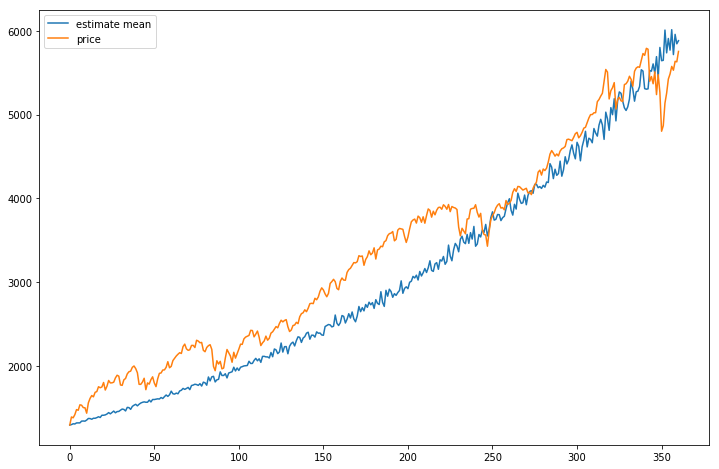

In [52]:
# we can also use python dictionary to save array corresponding to parameters
SSS = np.zeros((361, 1000))
for j in range(1000):
    for k in range(361):
        SSS[k,j] = S(0.00420964708234474, 0.00881310216250509, k)

S_stat = np.zeros(361)
for k in range(361):
    S_stat[k] = np.mean(SSS[k,:])

plt.figure(figsize = (12, 8))
plt.plot(S_stat[:], label='estimate mean')
plt.legend()

plt.plot(new, label = 'price')
plt.legend()

plt.show()